## Main Library

In [1]:
# Reading And Visualization
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Training DAta And Enocder 
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor

import warnings

In [2]:
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Reading Trainging And Testing Data

data_train = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Project ML\train.csv")
data_test = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Project ML\test.csv")

test_id = data_test["id"]

In [4]:
data_train.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
data_test.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [6]:
data_train.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [7]:
data_test.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

#### Data is Cleaning in Trainig And Testing

In [8]:
data_train = data_train.drop(columns="id", axis=1)
data_test = data_test.drop(columns="id", axis=1)

In [9]:
data_train.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Make_Visualization

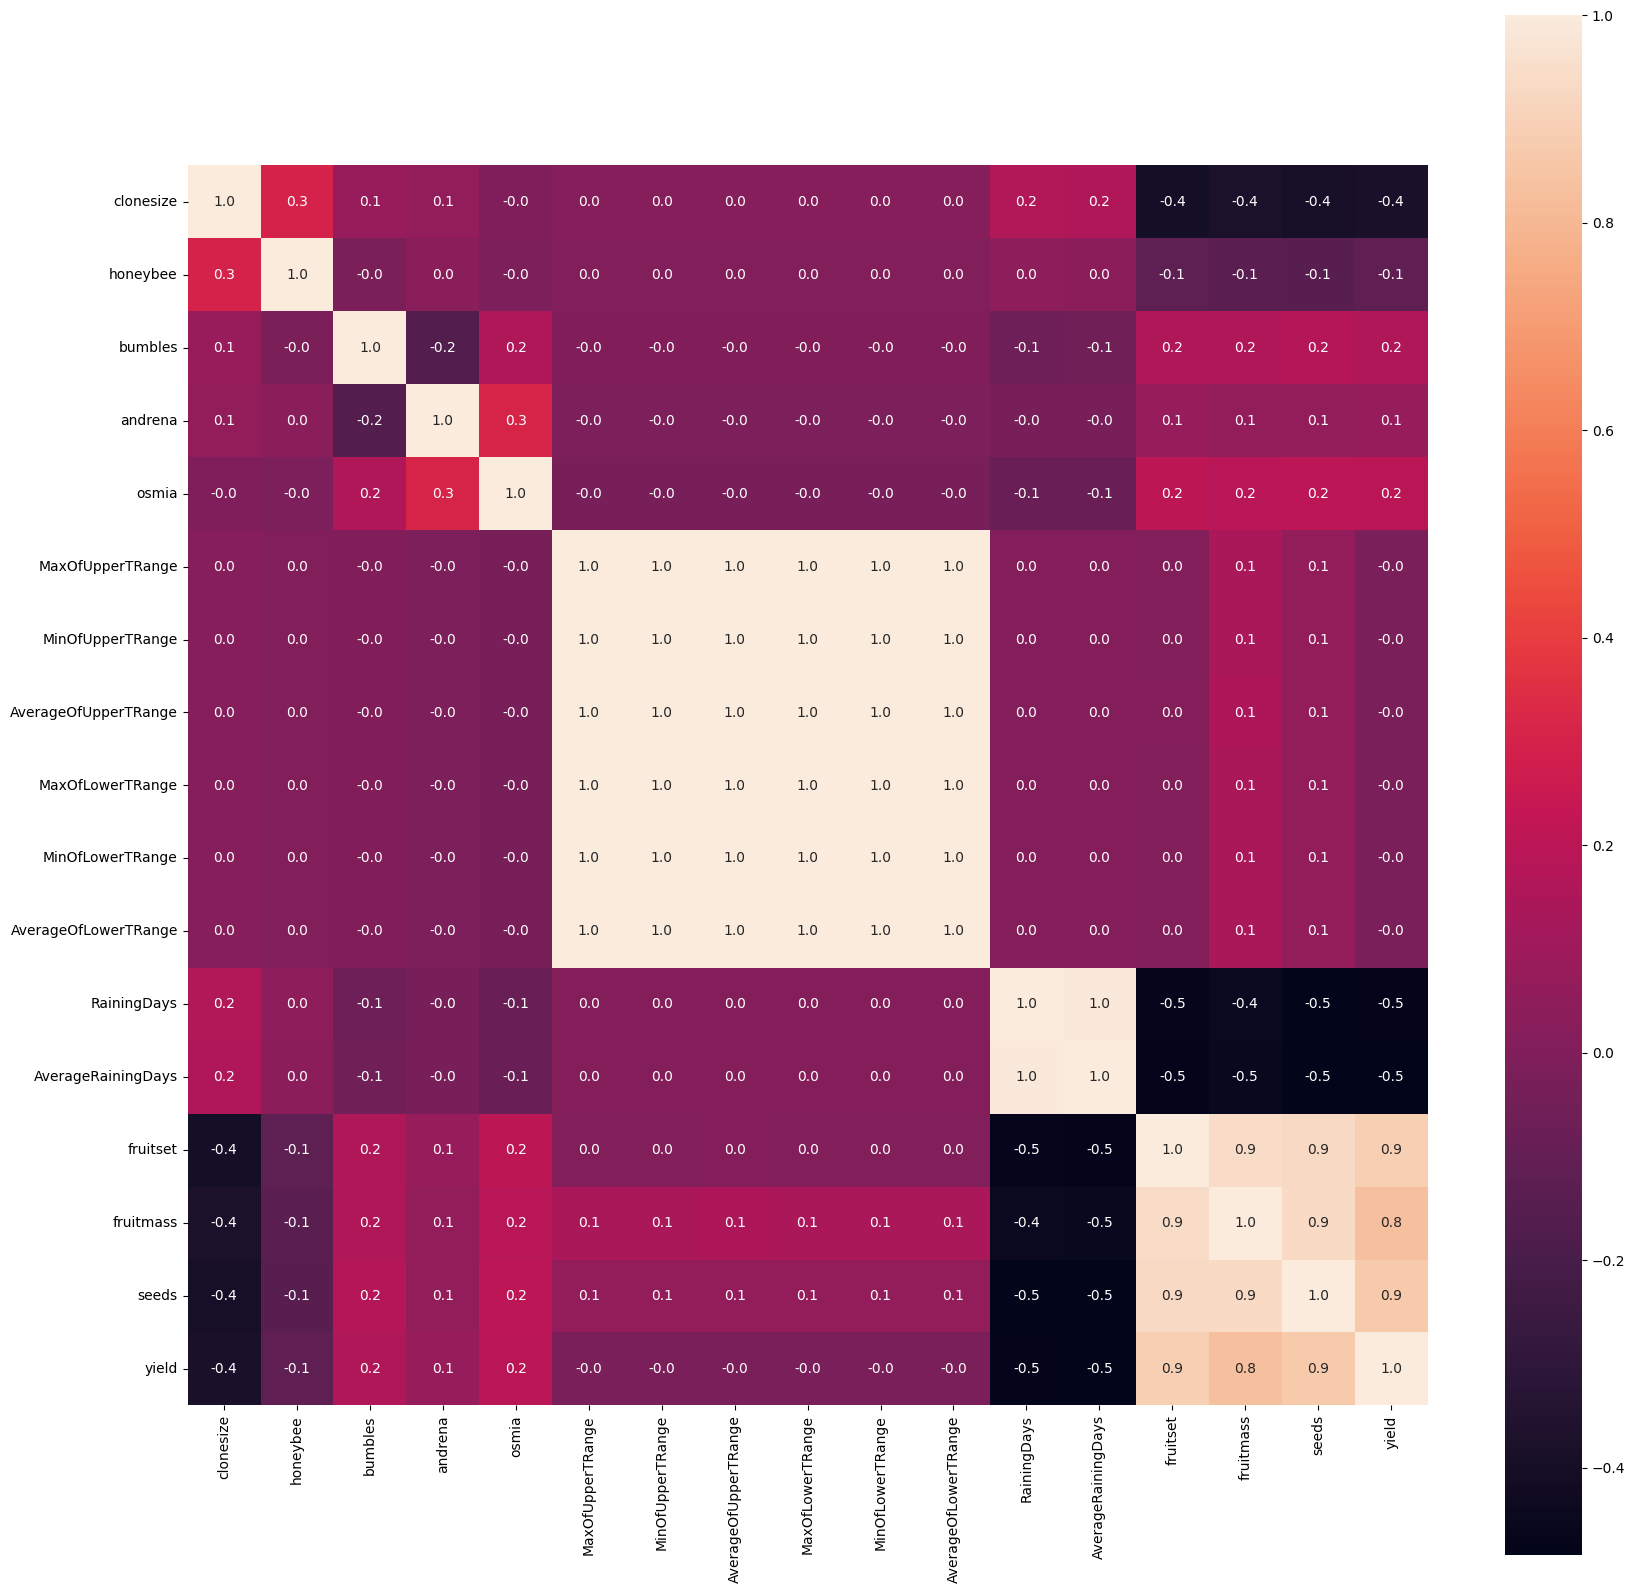

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_train.corr(), annot=True, square=True, fmt="0.1f");

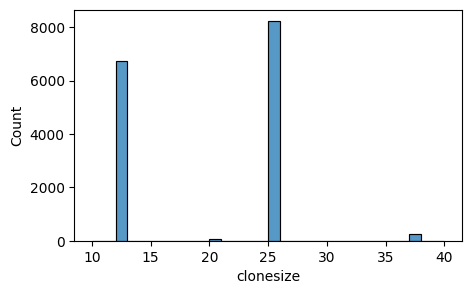

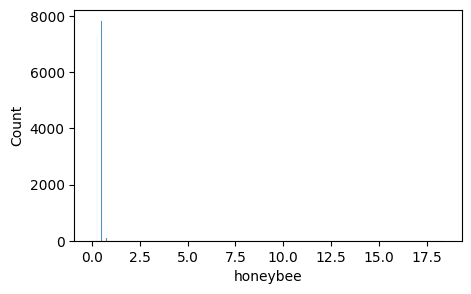

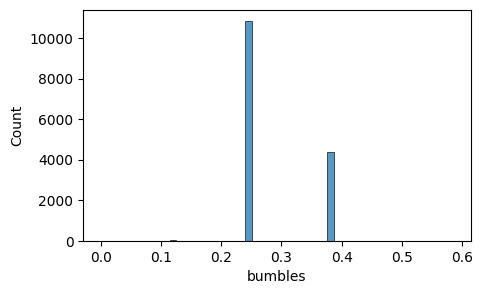

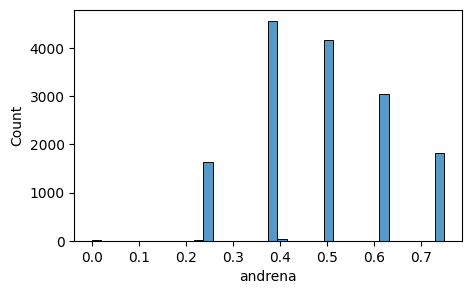

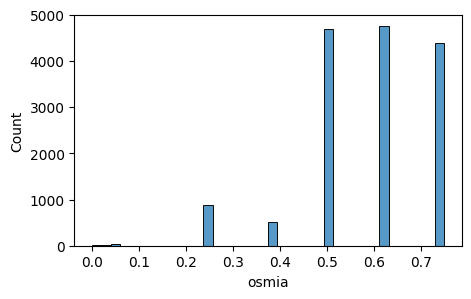

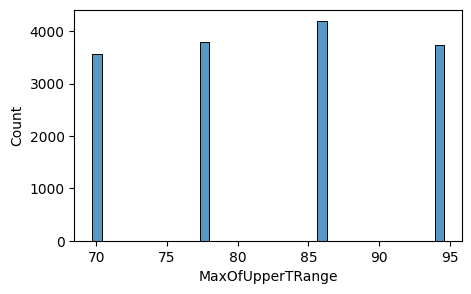

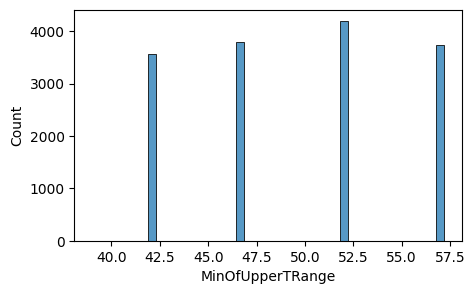

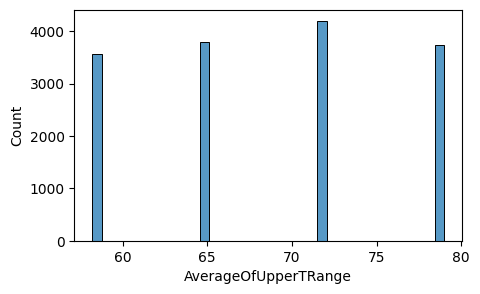

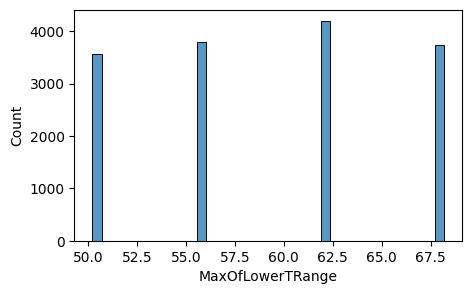

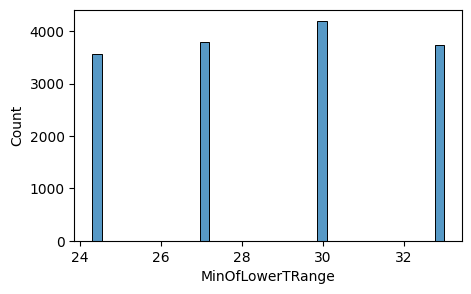

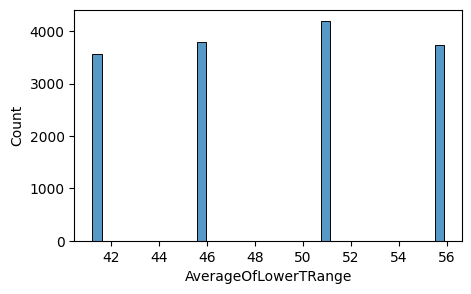

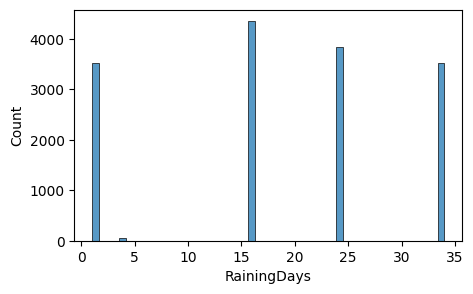

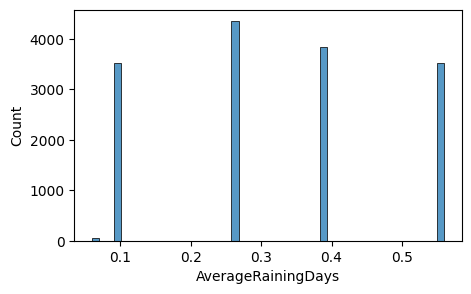

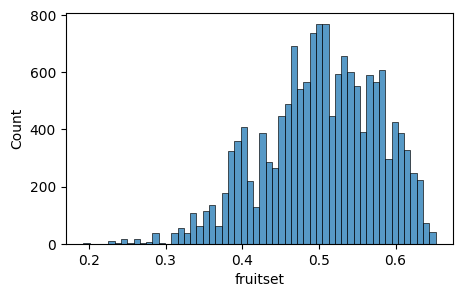

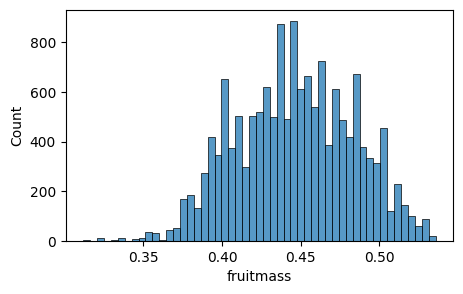

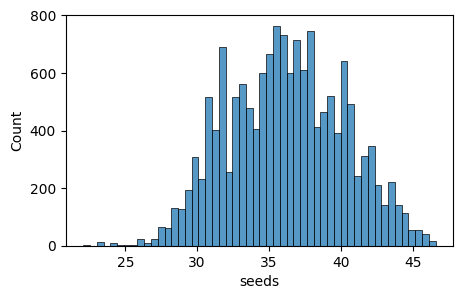

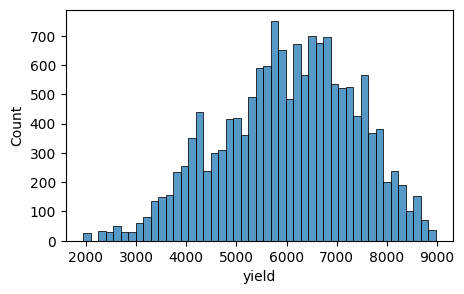

In [20]:
for col in data_train.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data_train[col])
    plt.show()

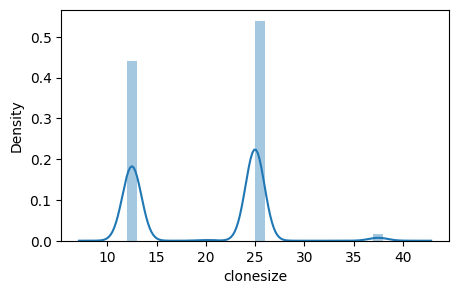

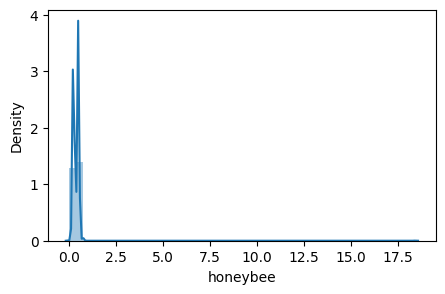

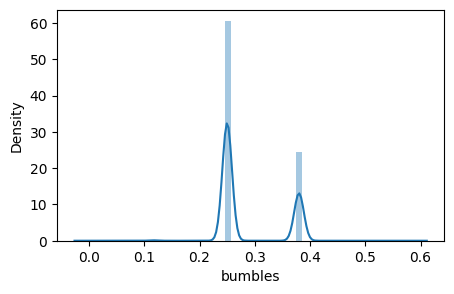

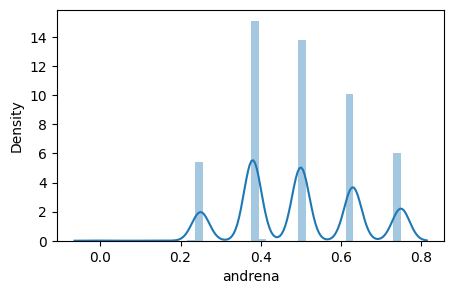

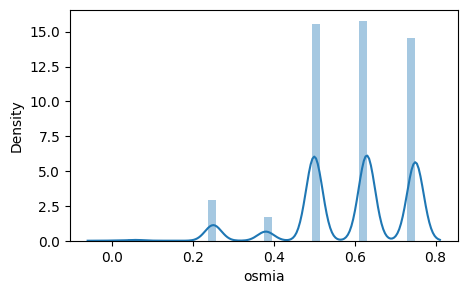

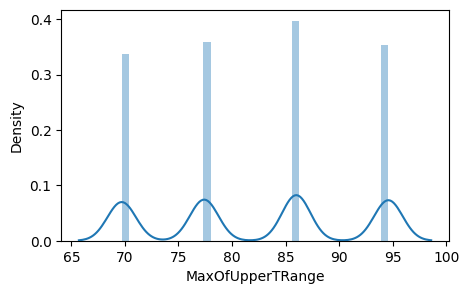

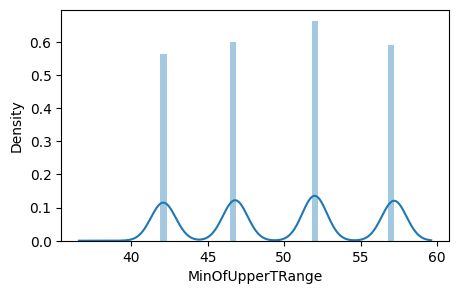

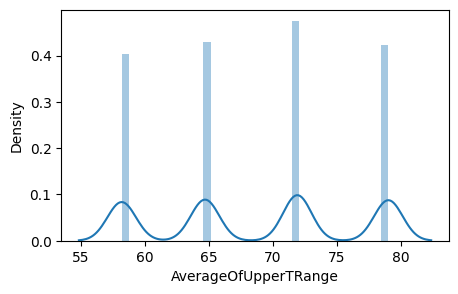

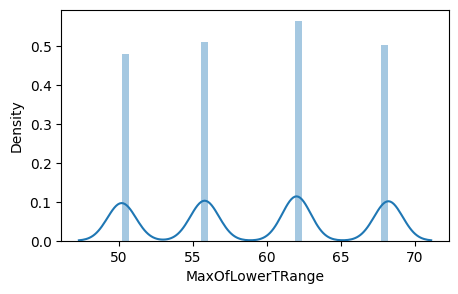

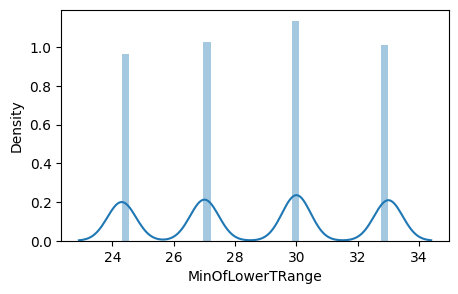

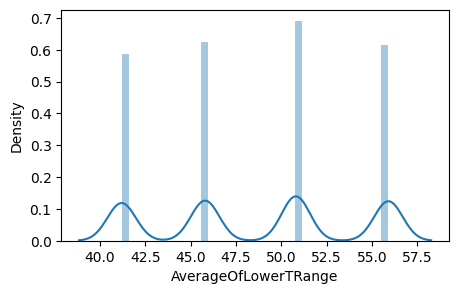

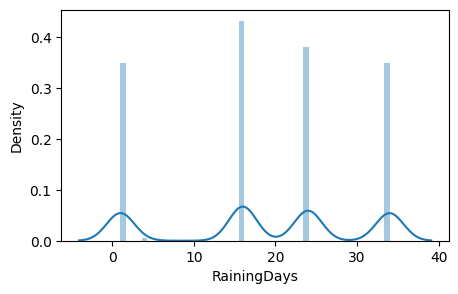

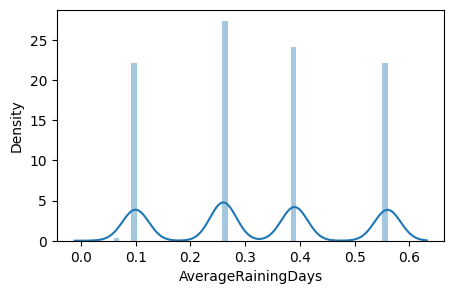

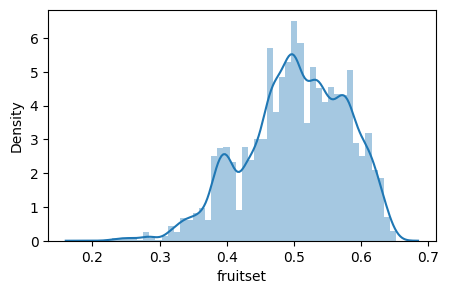

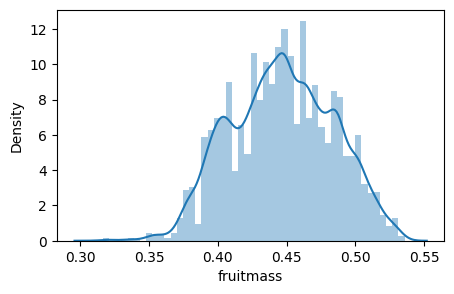

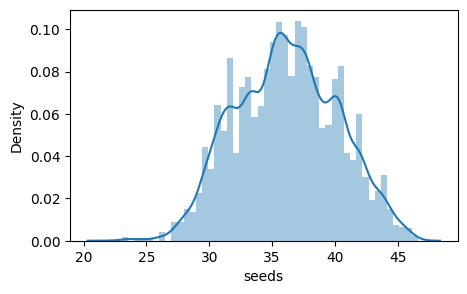

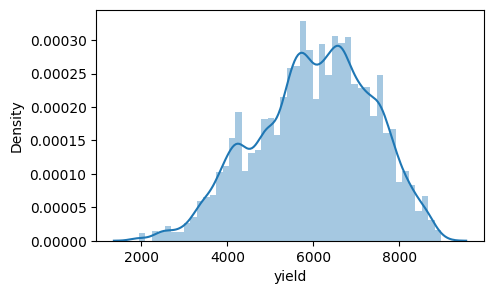

In [22]:
for col in data_train.columns:
    plt.figure(figsize=(5, 3))
    sns.distplot(data_train[col])
    plt.show()

<Figure size 1000x1000 with 0 Axes>

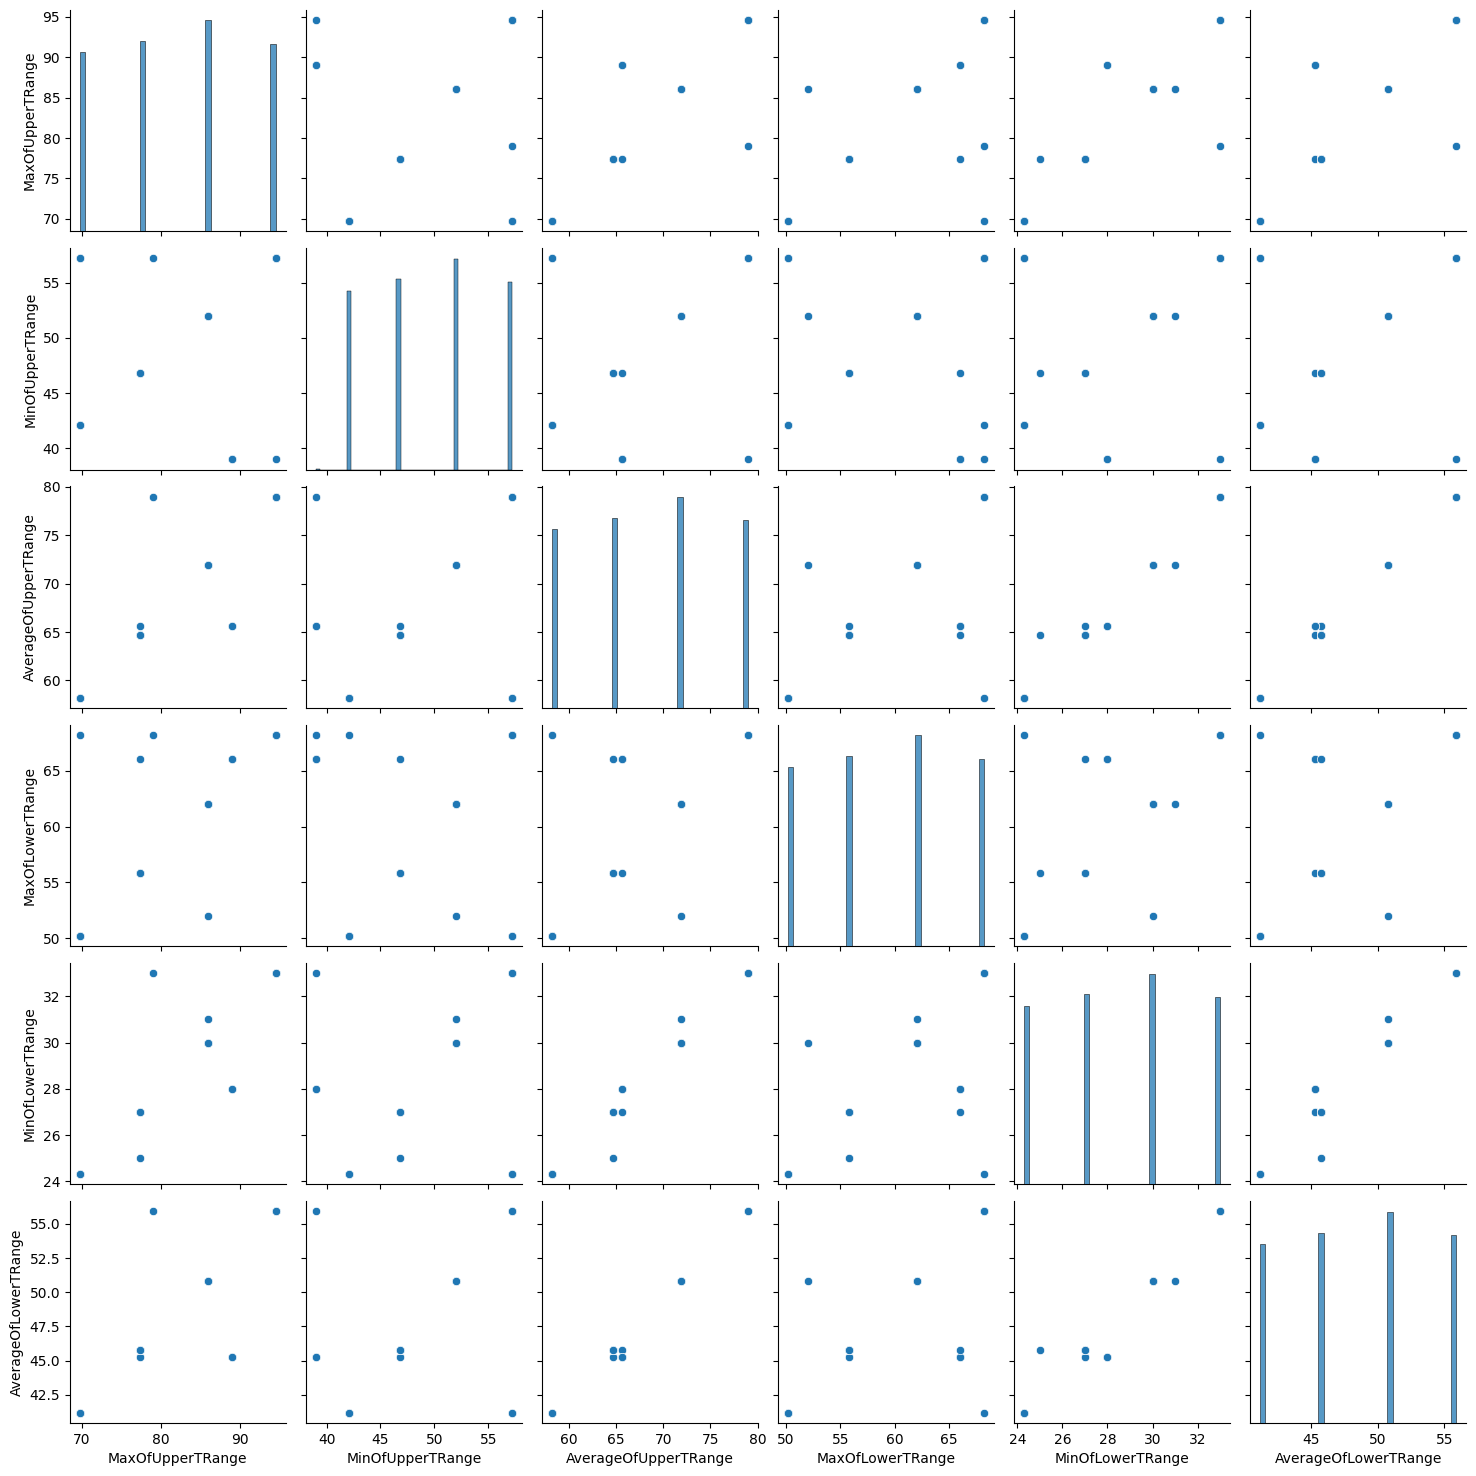

In [23]:
plt.figure(figsize=(10, 10))
sns.pairplot(data_train[data_train.iloc[:, 5:11].columns])
plt.show()

## --------------------------------------------------------------------------------------------------------------

## Splitting Data 

In [24]:
x_input = data_train.drop(columns="yield")
y_output = data_train["yield"]

x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, train_size=0.8, random_state=42)

## Building Model

### Model 1 == > AdaBoost

In [25]:
model1 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=100, 
                                                           min_samples_split=5,
                                                           min_samples_leaf=5),
                                                           n_estimators=50,
                                                           learning_rate=0.01)

model1.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=100,
                                                  min_samples_leaf=5,
                                                  min_samples_split=5),
                  learning_rate=0.01)

In [26]:
print(f"THe Training Accuracy SCore is ==> {model1.score(x_train, y_train)*100} %")
print(f"THe Testing Accuracy SCore is ==> {model1.score(x_test, y_test)*100} %")

THe Training Accuracy SCore is ==> 93.57208196211243 %
THe Testing Accuracy SCore is ==> 81.4041804418703 %


## Model 2 ==> XGBoost

In [27]:
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=50,
                                         learning_rate=0.1)

model_xgb.fit(x_train, y_train)


print(f"The predict Score Train in -XGBRegressor- is ==> {model_xgb.score(x_train, y_train)}")
print(f"The predict Score Test in -XGBRegressor- is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train in -XGBRegressor- is ==> 0.999994586280973
The predict Score Test in -XGBRegressor- is ==> 0.799695891000574


## -------------------------------------------------------------------------------------------------

# Make Prediction

In [28]:
data_test.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [29]:
prediction = model1.predict(data_test)

In [30]:
new_data = pd.DataFrame({"ID":test_id, 
                         "yield":prediction})

In [32]:
new_data.head(10)

,ID,yield
0,15289,4303.673046
1,15290,5964.638130
2,15291,7207.195327
3,15292,4586.826372
4,15293,3836.343491
5,15294,5291.588199
6,15295,7376.582836
7,15296,6479.914858
8,15297,7860.955088
9,15298,4290.926040
